In [98]:
exec("\nfrom ipywidgets import widgets \nfrom ipywidgets import Layout, HBox, VBox\nfrom IPython.display import display\n\nclass Pixel():\n    \n    def __init__(self, layout):\n        self._button = widgets.ToggleButton(description='',button_style='',layout=layout,disabled=True)\n        \n    def set_color(self,color):\n        if color in ['grey','gray']:\n            self._button.button_style = ''\n        elif color=='green':\n            self._button.button_style = 'success'\n        elif color=='blue':\n            self._button.button_style = 'info'\n        elif color=='orange':\n            self._button.button_style = 'warning'\n        elif color=='red':\n            self._button.button_style = 'danger'\n            \n    def set_brightness(self,bright):\n        self._button.value = not bright\n        \n    def set_text(self,text):\n        self._button.description = text\n        \n\nclass JupyterWidgetEngine():\n    \n    def __init__(self,start,next_frame,L=8):\n        \n        self.next_frame = next_frame\n        self.L = L\n        \n        width = int(50*8/L)\n        wide = str(7*width+24)+'px'\n        wider = str(L*width+(L-1)*4)+'px'\n        width = str(width)+'px'\n        height = width\n        width = str(int(50*8/L))+'px'\n\n        layout = Layout(width=width, height=height)\n\n        screen = {}\n        for x in range(L):\n            for y in range(L):\n                screen[x,y] = Pixel(layout)\n        screen['text'] = Pixel(Layout(width=wider, height=height))\n\n        controller = {}\n        controller['blank'] = widgets.ToggleButton(description='',button_style='',layout=layout)\n        controller['up'] = widgets.ToggleButton(description='▲',button_style='',layout=layout)\n        controller['down'] = widgets.ToggleButton(description='▼',button_style='',layout=layout)\n        controller['left'] = widgets.ToggleButton(description='◀︎',button_style='',layout=layout)\n        controller['right'] = widgets.ToggleButton(description='►',button_style='',layout=layout)\n        controller['A'] = widgets.ToggleButton(description='A',button_style='',layout=layout)\n        controller['B'] = widgets.ToggleButton(description='B',button_style='',layout=layout)\n        controller['X'] = widgets.ToggleButton(description='X',button_style='',layout=layout)\n        controller['Y'] = widgets.ToggleButton(description='Y',button_style='',layout=layout)\n        controller['next'] = widgets.ToggleButton(description='Next',button_style='',layout=Layout(width=wide, height=height))\n\n        [b,u,d,l,r,A,B,X,Y,c] = [controller['blank'],\n                             controller['up'],\n                             controller['down'],\n                             controller['left'],\n                             controller['right'],\n                             controller['A'],\n                             controller['B'],\n                             controller['X'],\n                             controller['Y'],\n                             controller['next']]\n\n\n        interface = []\n        interface.append( widgets.HBox([screen[x,0]._button for x in range(L)]+[b,u,b,b,b,X,b]) )\n        interface.append( widgets.HBox([screen[x,1]._button for x in range(L)]+[l,b,r,b,Y,b,A]) )\n        interface.append( widgets.HBox([screen[x,2]._button for x in range(L)]+[b,d,b,b,b,B,b]) )\n        interface.append( widgets.HBox([screen[x,3]._button for x in range(L)]+[c]) )\n        for y in range(4,L):\n            interface.append( widgets.HBox([screen[x,y]._button for x in range(L)]) )\n        interface.append( screen['text']._button )\n            \n        self.screen = screen\n        self.controller = controller\n            \n        start(self)\n            \n        display(widgets.VBox(interface))\n        \n        b.observe(self.given_blank)\n        \n        for button in self.controller:\n            if button!='blank':\n                self.controller[button].observe(self.given_button)\n        \n        \n\n    def given_blank(self,obs_b):\n        if self.controller['blank'].value:\n            self.controller['blank'].value = False\n    \n\n\n    def given_button(self,obs_n):\n\n        for button in self.controller:\n            if self.controller[button].value is True:\n                self.next_frame(self)\n\n        for button in self.controller.values():\n            button.value = False\n            \n")

In [91]:
# function called when setting up
def start(engine):
    # just move on to the first frame
    next_frame(engine)

# this is the function that does everything
def next_frame (engine):
    
    # set all pixels to green
    for x in range(engine.L):
        for y in range(engine.L):
            engine.screen[x,y].set_color('green')
    
# run the game for an 8x8 screen
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [92]:
# function called when setting up
def start(engine):
    
    # set a parameter to keep track of the player pixel
    engine.X = 1
    engine.Y = 2
    
    # then move on to the first frame
    next_frame(engine)

# this is the function that does everything
def next_frame (engine):
    
    # set all pixels to green
    for x in range(engine.L):
        for y in range(engine.L):
            engine.screen[x,y].set_color('green')
            
    # draw the player pixel
    engine.screen[engine.X,engine.Y].set_color('red')
    
# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [93]:
# this is the function that does everything
def next_frame (engine):
    
    # change player position
    if engine.controller['up'].value:
        engine.Y -= 1
    if engine.controller['down'].value:
        engine.Y += 1
    if engine.controller['right'].value:
        engine.X += 1
    if engine.controller['left'].value:
        engine.X -= 1
    
    # set all pixels to green
    for x in range(engine.L):
        for y in range(engine.L):
            engine.screen[x,y].set_color('green')
            
    # draw the player pixel
    engine.screen[engine.X,engine.Y].set_color('red')
    
# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [94]:
# this is the function that does everything
def next_frame (engine):
    
    # remove initial text
    if engine.controller['A'].value:
        engine.screen['text'].set_text('')
    
    # change player position
    if engine.controller['up'].value:
        engine.Y -= 1
    if engine.controller['down'].value:
        engine.Y += 1
    if engine.controller['right'].value:
        engine.X += 1
    if engine.controller['left'].value:
        engine.X -= 1
    
    # set all pixels to green
    for x in range(engine.L):
        for y in range(engine.L):
            engine.screen[x,y].set_color('green')
            
    # draw the player pixel
    Xs = engine.X%engine.L
    Ys = engine.Y%engine.L
    engine.screen[Xs,Ys].set_color('red')
    
# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [95]:
import numpy as np

def get_color(X,Y):
    return 'green'

# this is the function that does everything
def next_frame (engine):
    
    # remove initial text
    if engine.controller['A'].value:
        engine.screen['text'].set_text('')
    
    # change player position
    if engine.controller['up'].value:
        engine.Y -= 1
    if engine.controller['down'].value:
        engine.Y += 1
    if engine.controller['right'].value:
        engine.X += 1
    if engine.controller['left'].value:
        engine.X -= 1
    
    # set all pixels to green
    for x in range(engine.L):
        for y in range(engine.L):
            # get the 'world' coordinates X,Y from the onscreen coordinates x,y
            X = np.floor(engine.X/engine.L)*engine.L+x
            Y = np.floor(engine.Y/engine.L)*engine.L+y
            # set it to whatever colour it should be
            engine.screen[x,y].set_color(get_color(X,Y))
            
    # draw the player pixel
    Xs = engine.X%engine.L
    Ys = engine.Y%engine.L
    engine.screen[Xs,Ys].set_color('red')
    
# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [96]:
def get_color(X,Y):
    if X<12:
        color = 'green'
    else:
        color = 'orange'
    return color
    
# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [97]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

In [10]:
theta = np.pi/2

qc = QuantumCircuit(1)
qc.ry(theta,0)

state = Statevector.from_instruction(qc)
probs = state.probabilities_dict()

print(probs)

{'0': 0.5000000000000001, '1': 0.4999999999999999}


In [11]:
def get_color(X,Y):
    
    # set an angle for ry based on the coordinate
    thet = X*(np.pi/16)
    
    # create and simulate the circuit
    qc = QuantumCircuit(1)
    qc.ry(theta,0)
    state = Statevector.from_instruction(qc)
    probs = state.probabilities_dict()
    
    # get the prob of '1'
    if '1' in probs:
        height = probs['1']
    else:
        height = 0
    
    # set colour accordingly
    if height<0.1: # sea/river
        color = 'blue'
    elif height<0.3: # beach
        color = 'orange'
    elif height<0.9: # grass
        color = 'green'
    else: # mountain
        color = 'grey'
        
    return color
    
# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [12]:
import random

seed = [random.random() for _ in range(4)]

def get_color(X,Y):
    
    qc = QuantumCircuit(1)

    theta1 = (seed[0]*X+seed[1]*Y)*np.pi/16
    theta2 = (seed[2]*X-seed[3]*Y)*np.pi/16
    qc.ry(theta1,0)
    qc.rx(theta2,0)

    state = Statevector.from_instruction(qc)
    probs = state.probabilities_dict()
    
    try:
        height = probs['1']
    except:
        height = 0
        
    # set colour accordingly
    if height<0.1: # sea/river
        color = 'blue'
    elif height<0.3: # beach
        color = 'orange'
    elif height<0.9: # grass
        color = 'green'
    else: # mountain
        color = 'grey'
        
    return color

# run the game
engine = JupyterWidgetEngine(start,next_frame,L=8)

In [4]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.visualization import circuit_drawer

# Define Quantum and Classical Registers

var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)
# Known qubits
# Case 1: no knwon values => 2 possible solutions: 0110 and 1001
known_qubits = {}
# Case 2: v₃ = 1 => only one solution 0110
known_qubits = {3: True}

# List of quibits which values are being calculated
unknown_qubits = [x for x in range(len(var_qubits)) if x not in known_qubits]
# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
for index, var_qubit in enumerate(var_qubits):
    if index in known_qubits:
        # qubits are in |0> state by dafault
        # if known_qubits[index] = 1, we switch qubit to |1>
        # using a not gate (qc.x)
        if known_qubits[index]:
            qc.x(index)
    if index in unknown_qubits:
        # qubit initialized in the |+> state with an Hadamard gate (qc.h)
        qc.h(var_qubit)
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)
    clause_list = [(0, 1), (0, 2), (1, 3), (2, 3)]

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
def diffuser(value_qubits_number, unknown_qubits):
    qc = QuantumCircuit(value_qubits_number)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in unknown_qubits:
        qc.h(qubit)

    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in unknown_qubits:
        qc.x(qubit)

    # Do multi-controlled-Z gate
    qc.h(value_qubits_number - 1)
    qc.mct(unknown_qubits[:-1], value_qubits_number - 1)  # multi-controlled-toffoli
    qc.h(value_qubits_number - 1)

    # Apply transformation |11..1> -> |00..0>
    for qubit in unknown_qubits:
        qc.x(qubit)

    # Apply transformation |00..0> -> |s>
    for qubit in unknown_qubits:
        qc.h(qubit)

    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s
    ## First Iteration
# Apply our oracle
clause_list = [(0, 1), (0, 2), (1, 3), (2, 3)]
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(len(var_qubits), unknown_qubits), [0,1,2,3])

## Second Iteration
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(len(var_qubits), unknown_qubits), [0,1,2,3])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(fold=-1)
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
result = aer_simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())
from ibm_quantum_widgets import CircuitComposer
import numpy as np
from numpy import pi
from qiskit import Aer, ClassicalRegister, QuantumCircuit, QuantumRegister, assemble, transpile
from qiskit.visualization import plot_histogram

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

def diffuser(value_qubits, qubits):
    qc = QuantumCircuit(value_qubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in qubits:
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in qubits:
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(value_qubits - 1)
    qc.mct(qubits[:-1], value_qubits - 1)  # multi-controlled-toffoli
    qc.h(value_qubits - 1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in qubits:
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in qubits:
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

value_qubits = 4
clause_number = len(clause_list)
var_qubits = QuantumRegister(value_qubits, name='v')
clause_qubits = QuantumRegister(clause_number, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(value_qubits, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Known qubits
# Case 1: no knwon values
known_qubits = {}
# Case 2: v₂ = 1
known_qubits = {2: True}

# List of quibits whose values we are calculating
unknown_qubits = [x for x in range(value_qubits) if x not in known_qubits]

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
for index, var_qubit in enumerate(var_qubits):
    if index in known_qubits:
        if known_qubits[index]:
            qc.x(index)
    if index in unknown_qubits:
        qc.h(var_qubit)

qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(value_qubits, unknown_qubits), [0,1,2,3])

## Second Iteration
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(value_qubits, unknown_qubits), [0,1,2,3])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
result = aer_simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())

ModuleNotFoundError: No module named 'ibm_quantum_widgets'

## Updated code

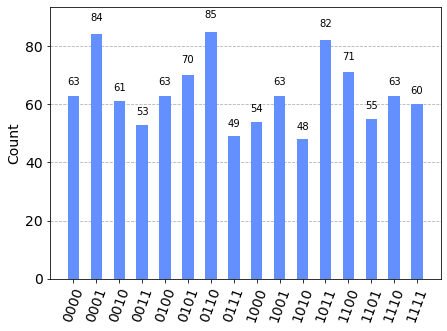

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, transpile
from qiskit.providers.aer.noise import NoiseModel, pauli_error
from qiskit.visualization import plot_histogram
import numpy as np

# Define Quantum and Classical Registers
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
ancilla = QuantumRegister(2, 'ancilla')  # Added ancilla for error correction
creg = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, ancilla, creg)

# Model noise using Qiskit's NoiseModel
noise_model = NoiseModel()
one_qubit_error = pauli_error([('X', 0.02), ('I', 0.98)])
two_qubit_error = pauli_error([('X', 0.02), ('I', 0.98)]).tensor(pauli_error([('X', 0.02), ('I', 0.98)]))

noise_model.add_all_qubit_quantum_error(one_qubit_error, ['h', 'rz'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx', 'cz'])

# Initialization and known qubits
known_qubits = {}  # Example case: no known values
unknown_qubits = [i for i in range(4) if i not in known_qubits]

# Initialize 'out' qubit
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize variable qubits and apply entanglement
for index, var_qubit in enumerate(var_qubits):
    if index in known_qubits:
        if known_qubits[index]:
            qc.x(index)
    if index in unknown_qubits:
        qc.h(var_qubit)
        if index < 3:
            qc.cx(var_qubit, var_qubits[index + 1])
            qc.rz(np.pi / 4, var_qubit)
            qc.rz(np.pi / 4, var_qubits[index + 1])
            qc.cz(var_qubit, var_qubits[index + 1])

# Error Correction: Applying CX gates
for i in range(0, 4, 2):
    qc.cx(var_qubits[i], ancilla[0])
    qc.cx(var_qubits[i + 1], ancilla[0])

    qc.cx(var_qubits[i], ancilla[1])
    qc.cx(var_qubits[i + 1], ancilla[1])

    qc.ccx(ancilla[0], ancilla[1], var_qubits[i])
    qc.ccx(ancilla[0], ancilla[1], var_qubits[i + 1])

# Define XOR function to check each clause
def xor(qc, q1, q2, output):
    qc.cx(q1, output)
    qc.cx(q2, output)

# Define the Sudoku Oracle
def sudoku_oracle(qc, clause_list, clause_qubits):
    for clause in clause_list:
        xor(qc, *clause[:-1], clause[-1])
        
    # Flip the 'out' qubit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clause checks to reset clause-checking qubits to 0
    for clause in reversed(clause_list):
        xor(qc, *clause[:-1], clause[-1])

# Define a diffuser for n qubits
def diffuser(n, unknown_qubits):
    qc = QuantumCircuit(n)
    for qubit in unknown_qubits:
        qc.h(qubit)
        qc.x(qubit)
    qc.h(unknown_qubits[-1])
    qc.mct(unknown_qubits[:-1], unknown_qubits[-1])
    qc.h(unknown_qubits[-1])
    for qubit in unknown_qubits:
        qc.x(qubit)
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

# Example clause list: 0 and 1 should not be the same, 2 and 3 should not be the same
clause_list = [(var_qubits[0], var_qubits[1], clause_qubits[0]), 
               (var_qubits[2], var_qubits[3], clause_qubits[1])]

# Example usage of oracle and other components
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply the diffuser
qc.append(diffuser(4, unknown_qubits), [0, 1, 2, 3])

# Final measurement
qc.measure(var_qubits, creg)

# Simulation with noise
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)
result = backend.run(transpiled_qc, noise_model=noise_model).result()
counts = result.get_counts()
plot_histogram(counts)